In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# processedImage1 = "./data_source/2/preprocessed_images"
# baseImage1 = "./data_source/2/image_data"
# baseImage2 = "./data_source/1/2_cataract"
train_dir = "./datasets/train"
validation_dir = "./datasets/validation"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(256, 256))     

# --------------------
# Flow validation images in batches of 16 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=16,
                                                         class_mode  = 'binary',
                                                         target_size = (256, 256))


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'), 
    # adding dropout layer
    tf.keras.layers.Dropout(0.5),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    # adding dropout layer
    tf.keras.layers.Dropout(0.5),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 1 for 1 class ('cataract') and 0 for the other ('normal')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 57600)            

In [ ]:
# model 1 (16, 32, 64 conv2d)(512 neuron) [optimizer= RMSprop, loss=binary_crossentropy]
# model 2 (16, 32, 64 conv2d)(256 neuron) [optimizer= RMSprop, loss=binary_crossentropy]
# model 4 (16, 32, 64 conv2d)(256, 128, 128 neuron) [optimizer= RMSprop, loss=binary_crossentropy]
# model 5 (16, 32, 64 conv2d)(256(l2), 128, 128 neuron) [optimizer= RMSprop, loss=binary_crossentropy]
# model 6 (16, 32, 64 conv2d)(256(l2), dropout(0.2), 128, dropout(0.2), 128 neuron) [optimizer= RMSprop, loss=binary_crossentropy]
# model 7 (16, 32, 64 conv2d)(512(l2), dropout(0.5), 256(l2), dropout(0.5), 256(l2) neuron) [optimizer= RMSprop, loss=binary_crossentropy] [step per epoch=25]

In [33]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [35]:
model.fit(train_generator,
            validation_data=validation_generator,
            steps_per_epoch=25,
            epochs=50,
            validation_steps=12)

Epoch 1/50
25/25 [==============================] - 78s 3s/step - loss: 3.8128 - accuracy: 0.5562 - val_loss: 3.0278 - val_accuracy: 0.5417
Epoch 2/50
25/25 [==============================] - 77s 3s/step - loss: 2.4963 - accuracy: 0.5638 - val_loss: 2.3316 - val_accuracy: 0.4896
Epoch 3/50
25/25 [==============================] - 77s 3s/step - loss: 1.6421 - accuracy: 0.5875 - val_loss: 1.3127 - val_accuracy: 0.6302
Epoch 4/50
25/25 [==============================] - 78s 3s/step - loss: 1.1312 - accuracy: 0.5925 - val_loss: 1.8083 - val_accuracy: 0.5104
Epoch 5/50
25/25 [==============================] - 76s 3s/step - loss: 0.9760 - accuracy: 0.6275 - val_loss: 0.8631 - val_accuracy: 0.6458
Epoch 6/50
25/25 [==============================] - 77s 3s/step - loss: 0.8989 - accuracy: 0.6275 - val_loss: 0.8105 - val_accuracy: 0.6354
Epoch 7/50
25/25 [==============================] - 77s 3s/step - loss: 0.7891 - accuracy: 0.6500 - val_loss: 0.8219 - val_accuracy: 0.6094
Epoch 8/50
25/25 [==

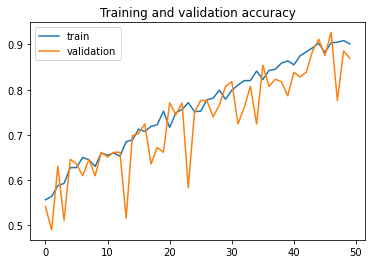

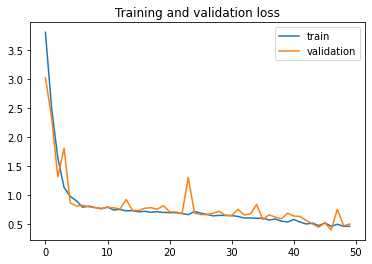

In [36]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = model.history.history['accuracy']
val_acc  = model.history.history['val_accuracy']
loss     = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(["train", "validation"])
plt.title('Training and validation accuracy')
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(["train", "validation"])
plt.title('Training and validation loss')
plt.show()

In [37]:
model.save("./model/cataract_model_7.h5")

In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('./model/model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp1x56bbd3\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp1x56bbd3\assets


In [44]:
import cv2
import os
import numpy as np
# from PIL import Image
from keras.preprocessing import image

In [53]:
# predicting images
path = "./datasets/validation/cataract/2112_right.jpg"
img = image.load_img(path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
print(classes[0])
if classes[0]>0.5:
    print("2112_right.jpg is a cataract")
else:
    print("2112_right.jpg is a normal")

[1.]
2112_right.jpg is a cataract


In [30]:
model_new = tf.keras.models.load_model('./model/cataract_model_4.h5')

In [31]:
model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)            

In [62]:
# predicting images
# path = "./datasets/validation/cataract/2112_right.jpg"
path = "./Normal.jpg"
img = image.load_img(path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_new.predict(images)
print(classes[0])
if classes[0]>0.5:
    print("n is a cataract")
else:
    print("n is a normal")

[1.]
n is a cataract
